<a href="https://colab.research.google.com/github/soujitha234/Land-use-Land-Cover-Classification/blob/main/Percentage_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import cv2
from skimage.color import rgb2lab, deltaE_cie76
from collections import Counter
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


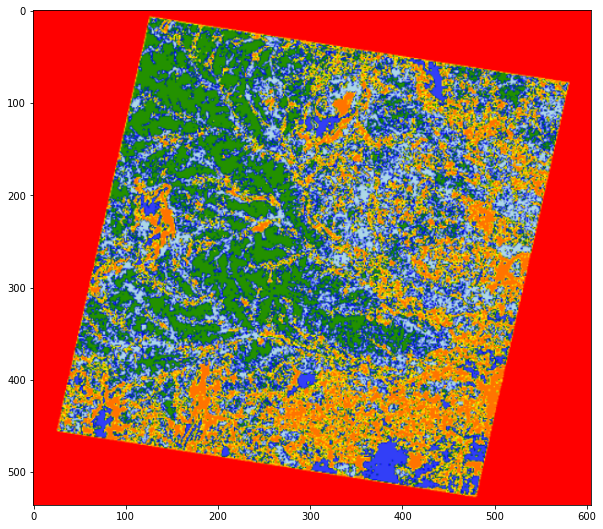

In [ ]:
pic=cv2.imread('/content/drive/MyDrive/2016.png')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(pic)

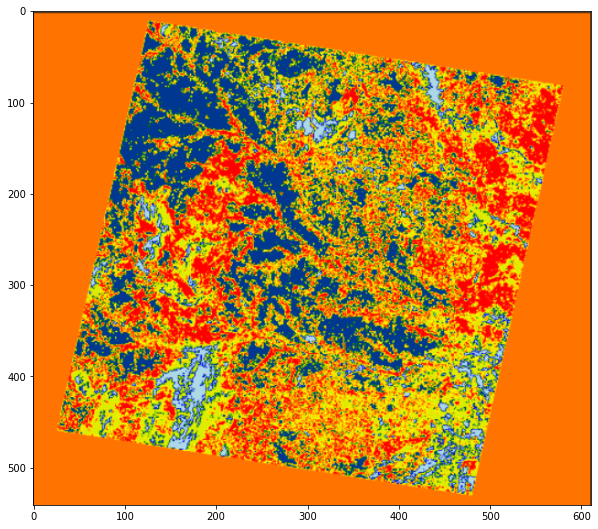

In [ ]:
image = cv2.imread('/content/drive/MyDrive/2017.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)

In [ ]:
print('Type of the image : ',type(pic))
print('Shape of the image : {}'.format(pic.shape))
print('Hight of the image {}'.format(pic.shape[0]))
print('Width of the image {}'.format(pic.shape[1]))
print('Dimension of the Image {}'.format(pic.ndim))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (536, 605, 3)
Hight of the image 536
Width of the image 605
Dimension of the Image 3


In [ ]:
print('Image size {}'.format(pic.size))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 972840
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [ ]:
print('Value of only R channel {}'.format(pic[ 150, 100, 0]))
print('Value of only G channel {}'.format(pic[ 150, 100, 1]))
print('Value of only B channel {}'.format(pic[ 150, 100, 2]))

Value of only R channel 35
Value of only G channel 145
Value of only B channel 0


In [ ]:
print("The type of image is {}".format(type(image)))
print("Shape of the image: {}".format(image.shape))

The type of image is <class 'numpy.ndarray'>
Shape of the image: (541, 611, 3)


In [ ]:
def RGB_HEX(color):
  return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_colors(image, number_of_colors, show_chart):
  reshaped_image = cv2.resize(image, (800, 1700))
  reshaped_image = reshaped_image.reshape(reshaped_image.shape[0]*reshaped_image.shape[1], 3)
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(reshaped_image)
  counts = Counter(labels)
  counts = dict(sorted(counts.items()))
  center_colors = clf.cluster_centers_
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB_HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]
  if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors,startangle=90, autopct='%.0f%%')
  return rgb_colors

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([2.54842537e+02, 6.57439380e-01, 3.39630797e-02]),
 array([ 45.94094948,  82.14494466, 174.75827103]),
 array([231.10013749, 157.36011758,   7.45724919]),
 array([126.71624427, 161.70428835, 211.37079418]),
 array([ 31.01975379, 127.07637026,  32.92603952]),
 array([135.28761145, 148.85290655,  64.86383214])]

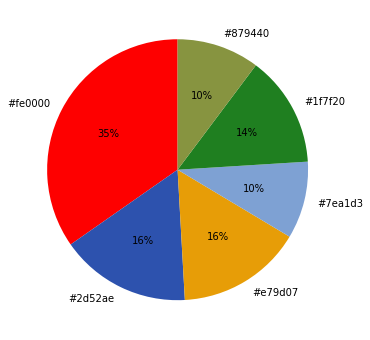

In [ ]:
#2016
get_colors(pic, 6, True)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([251.6644265 , 116.80087462,   0.40535235]),
 array([146.69596287, 178.60030179, 212.68875982]),
 array([224.08679937, 200.18618272,   3.5575232 ]),
 array([2.53348148e+02, 3.05491397e+01, 1.72214564e-01]),
 array([109.81981271, 139.55323902,  40.62641821]),
 array([ 14.8432056 ,  71.81620726, 126.05066464])]

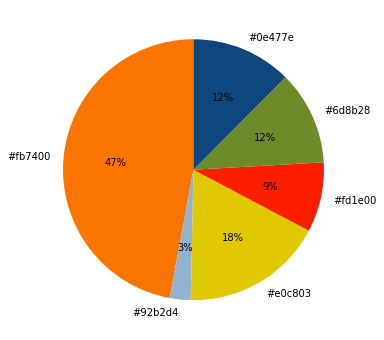

In [ ]:
#2017
get_colors(image, 6, True)